# Jake's Project

## Understanding Boom Error in Self-Propelled Sprayers

### Where do we go next?

In [1]:
#Insert libraiers
import numpy as np
import sklearn as sk
import sklearn.datasets as skd
import sklearn.ensemble as ske
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
#Insert Data CSV for EW-1
dataset = pd.read_csv('DataTableField_1EW.csv')
dataset.head()

,MaxError,CenterFrameRollRate_RotPot,CenterFrameRoll_LVDT,CylinderPressure,Speed,TiltUp,TiltDown,Condition,InletPress,ChassisPitchRate,ChassisRollAngle,ChassisRollRate,ChassisYawRate,RightFront,LeftFront,RightBack,LeftBack
0,54,0.0,0.0,2051,0.000000,0,0,0,1603,-0.726562,-1.678467,1.156250,-0.992188,0,0,0,0
1,58,0.0,0.0,2051,0.000000,0,0,0,1576,-0.750000,-1.678613,1.117188,-0.937500,0,0,0,0
2,58,0.1,0.0,2052,0.007812,0,380,0,1547,-0.734375,-1.679455,1.117188,-0.984375,0,0,0,0
3,-52,0.1,0.0,2039,0.007812,0,380,0,1488,-0.734375,-1.680426,1.109375,-0.875000,0,0,0,0
4,54,0.1,0.0,1926,0.007812,0,370,0,1437,-0.742188,-1.680754,1.187500,-0.929688,0,0,0,0


In [3]:
dataset.shape
#1826 samples from sensors, 11 features (10 features not counting error)
#add information on each featuer like they do in Boston Data Set

(1826, 17)

In [4]:
#check for null values
pd.isnull(dataset).any()

MaxError                      False
CenterFrameRollRate_RotPot    False
CenterFrameRoll_LVDT          False
CylinderPressure              False
Speed                         False
TiltUp                        False
TiltDown                      False
Condition                     False
InletPress                    False
ChassisPitchRate              False
ChassisRollAngle              False
ChassisRollRate               False
ChassisYawRate                False
RightFront                    False
LeftFront                     False
RightBack                     False
LeftBack                      False
dtype: bool

In [5]:
#describe dataset
dataset.describe()


,MaxError,CenterFrameRollRate_RotPot,CenterFrameRoll_LVDT,CylinderPressure,Speed,TiltUp,TiltDown,Condition,InletPress,ChassisPitchRate,ChassisRollAngle,ChassisRollRate,ChassisYawRate,RightFront,LeftFront,RightBack,LeftBack
count,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000,1826.000000
mean,128.474261,-0.050712,0.303845,2136.085433,16.052788,385.006024,295.175794,0.774918,2678.084337,-0.681878,0.575423,1.145605,-0.990998,1781.185652,1518.295181,1710.172508,1562.833516
std,150.850294,0.524336,0.592776,254.491522,6.529380,270.332369,221.861979,0.417751,272.251764,1.090001,1.655619,0.909266,0.846906,178.104421,158.265018,170.273325,156.602310
min,-152.000000,-2.200000,-1.367188,444.000000,0.000000,0.000000,0.000000,0.000000,1273.000000,-4.203125,-2.113697,-2.781250,-4.093750,0.000000,0.000000,0.000000,0.000000
25%,14.000000,-0.400000,-0.070312,2005.500000,18.398438,375.000000,0.000000,1.000000,2505.250000,-1.289062,-0.832335,0.595703,-1.484375,1744.000000,1481.000000,1672.000000,1532.000000
50%,117.000000,-0.100000,0.320312,2134.000000,19.273438,419.000000,370.000000,1.000000,2751.000000,-0.703125,0.517920,1.140625,-0.960938,1803.000000,1521.000000,1721.000000,1574.000000
75%,226.000000,0.300000,0.742188,2292.000000,19.500000,480.000000,450.000000,1.000000,2881.000000,-0.132812,1.891728,1.710938,-0.509766,1841.000000,1580.000000,1770.000000,1616.000000
max,547.000000,1.500000,1.945312,3081.000000,20.722656,2000.000000,780.000000,1.000000,3275.000000,4.492188,4.020060,5.015625,2.578125,2031.000000,1814.000000,1995.000000,1799.000000


In [6]:
#high number is 1 of correlation positive or negative
corr=dataset.corr(method = "pearson")
corr

,MaxError,CenterFrameRollRate_RotPot,CenterFrameRoll_LVDT,CylinderPressure,Speed,TiltUp,TiltDown,Condition,InletPress,ChassisPitchRate,ChassisRollAngle,ChassisRollRate,ChassisYawRate,RightFront,LeftFront,RightBack,LeftBack
MaxError,1.000000,0.042335,-0.280546,-0.141364,0.508675,-0.103610,0.440531,0.441292,0.110072,-0.051611,0.377030,-0.058067,-0.043688,-0.030670,0.077806,0.098535,0.176971
CenterFrameRollRate_RotPot,0.042335,1.000000,0.314572,-0.291306,-0.009243,-0.080210,0.127578,0.045672,0.036444,-0.140668,0.028830,-0.090876,0.313297,-0.037518,0.007149,0.053405,0.068529
CenterFrameRoll_LVDT,-0.280546,0.314572,1.000000,-0.148211,-0.500938,-0.047912,-0.172198,-0.563372,-0.109541,-0.007898,-0.642270,-0.068511,-0.014966,0.136039,0.030145,0.153234,-0.035092
CylinderPressure,-0.141364,-0.291306,-0.148211,1.000000,0.030176,0.366807,-0.224484,0.010912,0.067941,0.041253,0.047285,-0.034470,0.019754,0.035857,0.046009,-0.130506,-0.080680
Speed,0.508675,-0.009243,-0.500938,0.030176,1.000000,0.076787,0.359802,0.931168,0.201973,-0.026359,0.659686,-0.010394,-0.020742,0.059995,0.205378,0.072970,0.290604
TiltUp,-0.103610,-0.080210,-0.047912,0.366807,0.076787,1.000000,-0.154772,0.079784,0.086018,-0.087320,0.085320,-0.151650,0.050788,0.067482,0.097537,-0.049600,-0.002260
TiltDown,0.440531,0.127578,-0.172198,-0.224484,0.359802,-0.154772,1.000000,0.321350,0.125625,0.014174,0.326321,0.027096,-0.094849,-0.026825,0.067066,0.055970,0.170055
Condition,0.441292,0.045672,-0.563372,0.010912,0.931168,0.079784,0.321350,1.000000,0.137017,-0.048089,0.670223,-0.027138,0.100023,0.006328,0.143281,0.053668,0.252105
InletPress,0.110072,0.036444,-0.109541,0.067941,0.201973,0.086018,0.125625,0.137017,1.000000,-0.296756,0.228138,-0.029985,0.009302,0.349383,0.430750,0.342347,0.391082
ChassisPitchRate,-0.051611,-0.140668,-0.007898,0.041253,-0.026359,-0.087320,0.014174,-0.048089,-0.296756,1.000000,-0.062683,0.055744,-0.229387,-0.030520,-0.035561,0.050647,0.000091


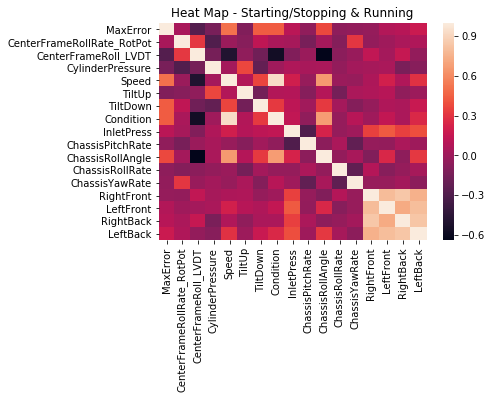

In [7]:
#create heat map
import seaborn as sns

ax = plt.axes()
sns.heatmap(corr)
ax.set_title('Heat Map - Starting/Stopping & Running')
plt.savefig('heatmapFeatures1.png', tight_layout= True)

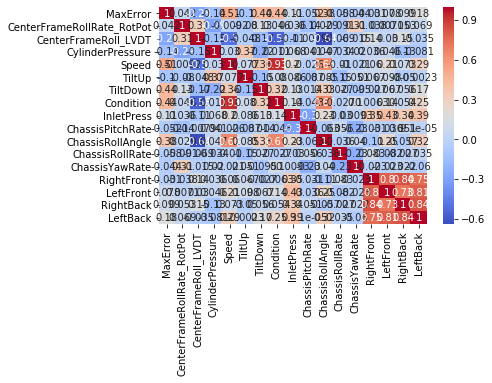

In [8]:
#create heatmap with values annotated
sns.heatmap(corr, annot=True, cmap='coolwarm')
#plt.savefig('heatmapABSValMore.png', tight_layout= True)

(array([  4.,   3.,   5.,   7.,  10.,   8.,  20.,  22.,  26.,  15.,  18.,
          9.,  18.,  40.,  36.,  30.,  36.,  46.,  58.,  78.,  97.,  66.,
         69.,  68.,  81.,  79.,  62.,  67.,  68.,  64.,  58., 118., 135.,
         70.,  37.,  29.,  15.,  23.,  17.,  43.,  17.,  13.,  10.,   6.,
          1.,   6.,   5.,   7.,   4.,   2.]),
 array([-1.3671875, -1.3009375, -1.2346875, -1.1684375, -1.1021875,
        -1.0359375, -0.9696875, -0.9034375, -0.8371875, -0.7709375,
        -0.7046875, -0.6384375, -0.5721875, -0.5059375, -0.4396875,
        -0.3734375, -0.3071875, -0.2409375, -0.1746875, -0.1084375,
        -0.0421875,  0.0240625,  0.0903125,  0.1565625,  0.2228125,
         0.2890625,  0.3553125,  0.4215625,  0.4878125,  0.5540625,
         0.6203125,  0.6865625,  0.7528125,  0.8190625,  0.8853125,
         0.9515625,  1.0178125,  1.0840625,  1.1503125,  1.2165625,
         1.2828125,  1.3490625,  1.4153125,  1.4815625,  1.5478125,
         1.6140625,  1.6803125,  1.7465625,  1

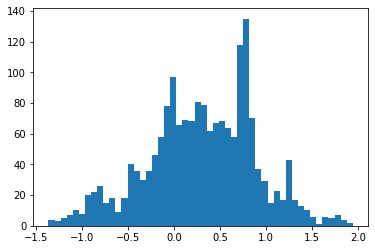

In [9]:
#look at distrubition of data

attribute = dataset['CenterFrameRoll_LVDT']
plt.hist(attribute, bins = 50)

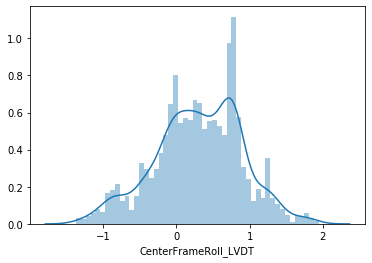

In [10]:
#distribution plot
sns.distplot(attribute, bins = 50)

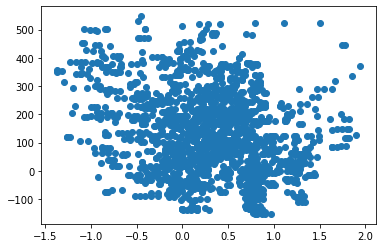

In [11]:
plt.scatter(dataset['CenterFrameRoll_LVDT'], dataset['MaxError'])

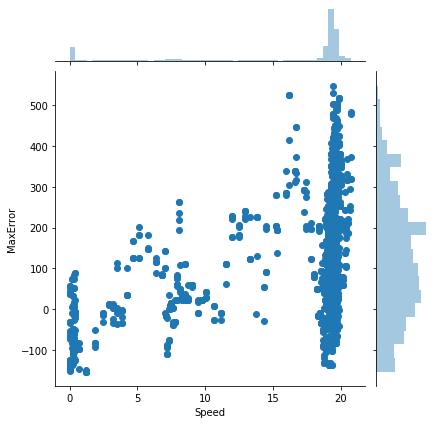

In [12]:
#jointplot of MaxError vs Speed
#scatter with distribution
sns.jointplot(dataset['Speed'], dataset['MaxError'], kind = 'scatter')

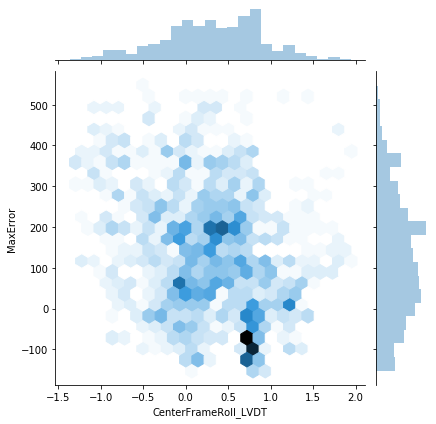

In [13]:
#kernel
sns.jointplot(dataset['CenterFrameRoll_LVDT'], dataset['MaxError'], kind = 'hex')

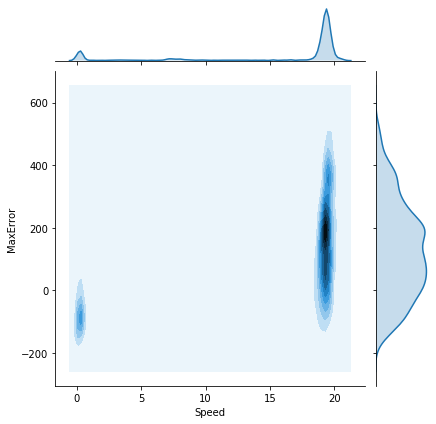

In [14]:
sns.jointplot(dataset['Speed'], dataset['MaxError'], kind = 'kde')

In [15]:
#split dataset into train and model
from sklearn.model_selection import train_test_split

#select features to look at (X is the features we will be evaluating)
X = dataset.iloc[:, 1:17].values
X

array([[ 0.000000e+00,  0.000000e+00,  2.051000e+03, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 0.000000e+00,  0.000000e+00,  2.051000e+03, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       [ 1.000000e-01,  0.000000e+00,  2.052000e+03, ...,  0.000000e+00,
         0.000000e+00,  0.000000e+00],
       ...,
       [-2.100000e+00,  1.093750e-01,  2.829000e+03, ...,  1.377000e+03,
         1.717000e+03,  1.455000e+03],
       [-2.000000e+00,  1.484375e-01,  2.826000e+03, ...,  1.397000e+03,
         1.726000e+03,  1.442000e+03],
       [-1.900000e+00,  9.375000e-02,  2.698000e+03, ...,  1.399000e+03,
         1.720000e+03,  1.443000e+03]])

In [16]:
#pick the target variables, Y is the target variable, MaxError
Y = dataset.iloc[:, 0].values
Y

array([ 54,  58,  58, ...,  55, -29, -11], dtype=int64)

In [17]:
X.shape


(1826, 16)

In [18]:
Y.shape

(1826,)

In [19]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [20]:
print(X_train.shape, Y_train.shape)

(1369, 16) (1369,)


In [21]:
#create random forest
reg = ske.RandomForestRegressor(n_estimators= 1000, random_state= 0)

In [22]:
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [23]:
#flatten y data
Y_train = np.ravel(Y_train)

In [24]:
#fit the random forest regressor with training data
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [25]:
#find predicted y values from the split data set
y_pred = reg.predict(X_test)

In [26]:
#find variance
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score

explained_variance_score(Y_test, y_pred)

0.8418373729456736

In [27]:
#calculate max error, difference, between the test and the predicted y
max_error(Y_test, y_pred)

208.302

In [28]:
#statistical analysis from 
print(mean_absolute_error(Y_test, y_pred))
print(mean_squared_error(Y_test, y_pred))
print(r2_score(Y_test, y_pred, multioutput='variance_weighted'))

44.75573741794311
3586.860128201313
0.8418345848314094


In [29]:
#find feature importance
reg.feature_importances_

array([4.97870667e-02, 9.06485170e-02, 2.37991246e-02, 3.72080168e-01,
       4.84677873e-02, 7.01861583e-02, 8.21329674e-05, 2.83122154e-02,
       2.60784030e-02, 8.82845350e-02, 1.93906405e-02, 4.03312784e-02,
       2.86144499e-02, 2.52589295e-02, 5.25175983e-02, 3.61609951e-02])

In [30]:
#feature index
fet_ind = np.argsort(reg.feature_importances_)[::-1]

In [31]:
#feature importance
fet_imp = reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1]

In [32]:
dataset.shape

(1826, 17)

In [33]:
z = dataset.columns[1:17]
z

Index(['CenterFrameRollRate_RotPot', 'CenterFrameRoll_LVDT',
       'CylinderPressure', 'Speed', 'TiltUp', 'TiltDown', 'Condition',
       'InletPress', 'ChassisPitchRate', 'ChassisRollAngle', 'ChassisRollRate',
       'ChassisYawRate', 'RightFront', 'LeftFront', 'RightBack', 'LeftBack'],
      dtype='object')

In [34]:
#mask the different features based off index ranking
z[fet_ind]

Index(['Speed', 'CenterFrameRoll_LVDT', 'ChassisRollAngle', 'TiltDown',
       'RightBack', 'CenterFrameRollRate_RotPot', 'TiltUp', 'ChassisYawRate',
       'LeftBack', 'RightFront', 'InletPress', 'ChassisPitchRate', 'LeftFront',
       'CylinderPressure', 'ChassisRollRate', 'Condition'],
      dtype='object')

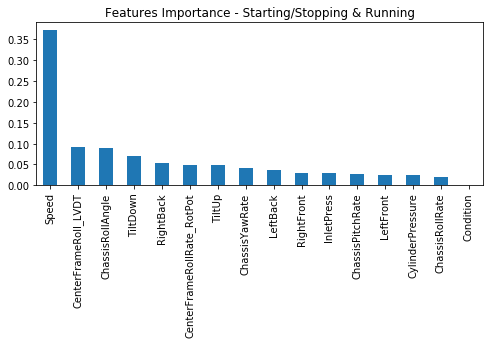

In [35]:
#create figure of feature importance of Starting/Stopping & Running
fig, ax = plt.subplots(1,1,figsize=(8,3))
labels = z[fet_ind]
pd.Series(fet_imp, index = labels).plot('bar', ax=ax)
ax.set_title('Features Importance - Starting/Stopping & Running')
plt.savefig('FeatureImportanceAll.png', tight_layout= True)

Text(0, 0.5, 'Value of Max Error [mm]')

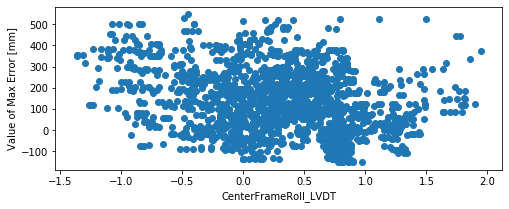

In [36]:
fig, ax = plt.subplots(1,1,figsize=(8,3))

ax.scatter(X[:, 1], Y)
ax.set_xlabel('CenterFrameRoll_LVDT')
ax.set_ylabel('Value of Max Error [mm]')

In [37]:
from sklearn import tree

In [38]:
tree.export_graphviz(reg.estimators_[0], 'tree.dot')

In [39]:
#export tree for decision tree
tree.export_graphviz(reg.estimators_[5], 'tree2.dot', feature_names = z, rounded = True, precision = 1)

In [40]:
mask1 = (dataset.Condition == 1)


In [41]:
dataset2 = dataset[mask1]
dataset2.head()

,MaxError,CenterFrameRollRate_RotPot,CenterFrameRoll_LVDT,CylinderPressure,Speed,TiltUp,TiltDown,Condition,InletPress,ChassisPitchRate,ChassisRollAngle,ChassisRollRate,ChassisYawRate,RightFront,LeftFront,RightBack,LeftBack
402,339,0.3,0.851562,1878,16.644531,0,522,1,2667,1.789062,-0.941759,1.492188,-1.726562,1834,1635,1696,1480
403,339,0.3,0.796875,1992,16.644531,0,522,1,2619,1.687500,-0.943369,1.132812,-1.765625,1823,1658,1672,1461
404,339,0.2,0.789062,2102,16.644531,0,559,1,2631,1.960938,-0.945176,0.773438,-1.773438,1883,1712,1701,1468
405,339,-0.1,0.687500,2102,16.644531,380,541,1,2503,2.195312,-0.951094,1.421875,-2.023438,1909,1707,1670,1445
406,312,-0.1,0.585938,2143,16.644531,380,531,1,2455,2.468750,-0.947326,1.414062,-1.875000,1916,1726,1663,1428


In [42]:
#create new dataset of only running values and condition erased
dataset3 = dataset2.drop(columns="Condition")
dataset3.head()

,MaxError,CenterFrameRollRate_RotPot,CenterFrameRoll_LVDT,CylinderPressure,Speed,TiltUp,TiltDown,InletPress,ChassisPitchRate,ChassisRollAngle,ChassisRollRate,ChassisYawRate,RightFront,LeftFront,RightBack,LeftBack
402,339,0.3,0.851562,1878,16.644531,0,522,2667,1.789062,-0.941759,1.492188,-1.726562,1834,1635,1696,1480
403,339,0.3,0.796875,1992,16.644531,0,522,2619,1.687500,-0.943369,1.132812,-1.765625,1823,1658,1672,1461
404,339,0.2,0.789062,2102,16.644531,0,559,2631,1.960938,-0.945176,0.773438,-1.773438,1883,1712,1701,1468
405,339,-0.1,0.687500,2102,16.644531,380,541,2503,2.195312,-0.951094,1.421875,-2.023438,1909,1707,1670,1445
406,312,-0.1,0.585938,2143,16.644531,380,531,2455,2.468750,-0.947326,1.414062,-1.875000,1916,1726,1663,1428


Text(0.5, 1.0, 'Scatter of Max Error vs Center Frame Roll LVDT')

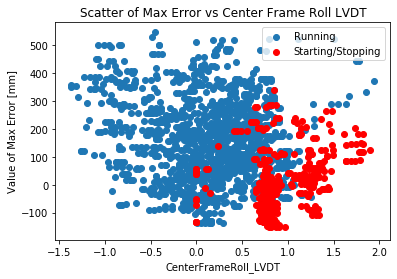

In [43]:
#scatter difference between the mask values
plt.scatter(dataset.CenterFrameRoll_LVDT[mask1], dataset.MaxError[mask1])
plt.scatter(dataset.CenterFrameRoll_LVDT[~mask1], dataset.MaxError[~mask1], color ='Red')
plt.legend(['Running' , 'Starting/Stopping'])
plt.xlabel('CenterFrameRoll_LVDT')
plt.ylabel('Value of Max Error [mm]')
plt.title('Scatter of Max Error vs Center Frame Roll LVDT')

In [44]:
#create correlation of dataset 3
corr=dataset3.corr(method = "pearson")
corr

,MaxError,CenterFrameRollRate_RotPot,CenterFrameRoll_LVDT,CylinderPressure,Speed,TiltUp,TiltDown,InletPress,ChassisPitchRate,ChassisRollAngle,ChassisRollRate,ChassisYawRate,RightFront,LeftFront,RightBack,LeftBack
MaxError,1.000000,0.014615,-0.095802,-0.177943,0.134828,-0.175111,0.338361,0.031745,-0.077517,0.099796,-0.038060,-0.129737,-0.159369,-0.067412,0.284740,0.172385
CenterFrameRollRate_RotPot,0.014615,1.000000,0.411705,-0.277282,-0.074495,-0.058546,0.131313,0.057689,-0.096415,0.021439,-0.064871,0.280388,-0.077886,-0.032643,0.209818,0.191361
CenterFrameRoll_LVDT,-0.095802,0.411705,1.000000,-0.188704,-0.138542,-0.010472,-0.027801,-0.184105,-0.028695,-0.453082,-0.104914,0.069163,0.036940,-0.059268,0.223732,-0.074046
CylinderPressure,-0.177943,-0.277282,-0.188704,1.000000,-0.032273,0.364709,-0.272328,0.036744,0.028614,0.045496,-0.052803,0.082497,0.002424,0.030980,-0.423992,-0.269075
Speed,0.134828,-0.074495,-0.138542,-0.032273,1.000000,-0.185965,0.018736,-0.010909,-0.201812,0.136267,0.104947,0.100226,-0.271919,-0.187440,-0.013828,0.273377
TiltUp,-0.175111,-0.058546,-0.010472,0.364709,-0.185965,1.000000,-0.234748,0.082038,-0.095903,0.040192,-0.173791,0.118032,0.054483,0.091050,-0.258520,-0.160159
TiltDown,0.338361,0.131313,-0.027801,-0.272328,0.018736,-0.234748,1.000000,0.075383,0.027315,0.157909,0.036871,-0.128619,-0.124481,-0.030928,0.152299,0.231653
InletPress,0.031745,0.057689,-0.184105,0.036744,-0.010909,0.082038,0.075383,1.000000,-0.363091,0.209505,-0.034410,0.110252,-0.078285,0.139354,0.016036,0.064951
ChassisPitchRate,-0.077517,-0.096415,-0.028695,0.028614,-0.201812,-0.095903,0.027315,-0.363091,1.000000,-0.057238,0.033617,-0.284134,-0.113284,-0.058616,0.121095,0.020737
ChassisRollAngle,0.099796,0.021439,-0.453082,0.045496,0.136267,0.040192,0.157909,0.209505,-0.057238,1.000000,-0.028640,0.013025,-0.462739,0.404372,-0.352118,0.514602


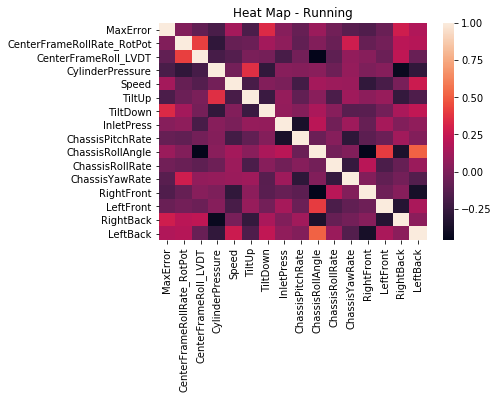

In [45]:
import seaborn as sns

ax = plt.axes()
sns.heatmap(corr)
ax.set_title('Heat Map - Running')
plt.savefig('heatmapFeatures2.png', tight_layout= True)

In [46]:
#split dataset into train and model
from sklearn.model_selection import train_test_split

#select features to look at
X = dataset3.iloc[:, 1:17].values
X

array([[ 3.000000e-01,  8.515625e-01,  1.878000e+03, ...,  1.635000e+03,
         1.696000e+03,  1.480000e+03],
       [ 3.000000e-01,  7.968750e-01,  1.992000e+03, ...,  1.658000e+03,
         1.672000e+03,  1.461000e+03],
       [ 2.000000e-01,  7.890625e-01,  2.102000e+03, ...,  1.712000e+03,
         1.701000e+03,  1.468000e+03],
       ...,
       [-1.000000e-01,  7.890625e-01,  2.375000e+03, ...,  1.371000e+03,
         1.954000e+03,  1.667000e+03],
       [-9.000000e-01,  6.562500e-01,  2.452000e+03, ...,  1.359000e+03,
         1.947000e+03,  1.646000e+03],
       [-1.400000e+00,  5.703125e-01,  2.461000e+03, ...,  1.346000e+03,
         1.919000e+03,  1.635000e+03]])

In [47]:
#pick the target variables
Y = dataset3.iloc[:, 0].values
Y

array([339, 339, 339, ..., 524, 414, 304], dtype=int64)

In [48]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [49]:
reg = ske.RandomForestRegressor(n_estimators= 1000, random_state= 0)

In [50]:
reg.fit(X_train, Y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=0, verbose=0,
                      warm_start=False)

In [51]:
y_pred = reg.predict(X_test)

In [52]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score

explained_variance_score(Y_test, y_pred)

0.7491786371320042

In [53]:
#calculate max error, difference, between the test and the predicted y
max_error(Y_test, y_pred)

261.73400000000004

In [54]:
reg.feature_importances_

array([0.0662129 , 0.11177375, 0.0343946 , 0.18123168, 0.0416968 ,
       0.11379962, 0.03620284, 0.03769911, 0.12101746, 0.02505476,
       0.05196037, 0.0378811 , 0.03140091, 0.06836437, 0.04130973])

In [55]:
fet_ind = np.argsort(reg.feature_importances_)[::-1]

In [56]:
fet_imp = reg.feature_importances_[np.argsort(reg.feature_importances_)][::-1]

In [57]:
dataset3.shape

(1415, 16)

In [58]:
z = dataset3.columns[1:16]
z

Index(['CenterFrameRollRate_RotPot', 'CenterFrameRoll_LVDT',
       'CylinderPressure', 'Speed', 'TiltUp', 'TiltDown', 'InletPress',
       'ChassisPitchRate', 'ChassisRollAngle', 'ChassisRollRate',
       'ChassisYawRate', 'RightFront', 'LeftFront', 'RightBack', 'LeftBack'],
      dtype='object')

In [59]:
z[fet_ind]

Index(['Speed', 'ChassisRollAngle', 'TiltDown', 'CenterFrameRoll_LVDT',
       'RightBack', 'CenterFrameRollRate_RotPot', 'ChassisYawRate', 'TiltUp',
       'LeftBack', 'RightFront', 'ChassisPitchRate', 'InletPress',
       'CylinderPressure', 'LeftFront', 'ChassisRollRate'],
      dtype='object')

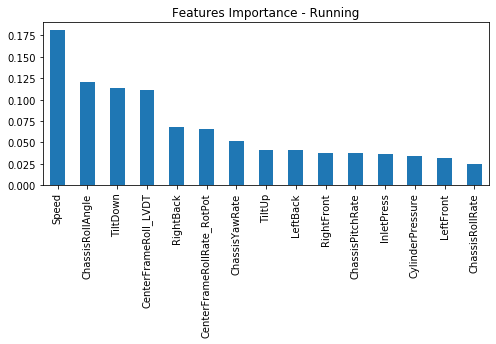

In [60]:
fig, ax = plt.subplots(1,1,figsize=(8,3))
labels = z[fet_ind]
pd.Series(fet_imp, index = labels).plot('bar', ax=ax)
ax.set_title('Features Importance - Running')
plt.savefig('FeatureImportanceAll2.png', tight_layout= True)

Text(0.5, 1.0, 'Predicted Values')

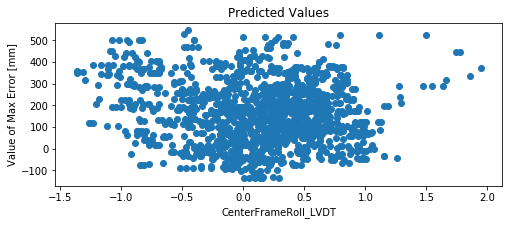

In [61]:
fig, ax = plt.subplots(1,1,figsize=(8,3))

ax.scatter(X[:, 1], Y)
ax.set_xlabel('CenterFrameRoll_LVDT')
ax.set_ylabel('Value of Max Error [mm]')
ax.set_title('Predicted Values')

In [62]:
from sklearn import tree

In [63]:
tree.export_graphviz(reg.estimators_[5], 'tree3Mask.dot', feature_names = z, rounded = True, precision = 1)

In [64]:
#statistical analysis from 
print(mean_absolute_error(Y_test, y_pred)) #56 mm #high chance of outliers use this one
print(mean_squared_error(Y_test, y_pred)) #mm^2 about 70 mm = 3 inches of difference
print(r2_score(Y_test, y_pred, multioutput='variance_weighted')) # 

56.42357344632768
5179.101015053672
0.7485211234998201


## Task for Students

Do random forest with ramp run once I create a CSV. They have to write python script for it.